# Exercises - Pollinators datasets exploration

Exercises with some pollinators datasets.

## Packages import

In [205]:
import os # operating system functions
import chardet # Universal Character Encoding Detector
import requests # web requests
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from sklearn.model_selection import StratifiedShuffleSplit # dataset subsetting 
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder # mange categorical data
from sklearn import metrics # results evaluation
from sklearn.impute import SimpleImputer # tool for dealing with missing values
import association_metrics as am # implementation of Cramer's V correlation
import matplotlib as plt # data visualization
from mpl_toolkits.mplot3d import Axes3D # visualization 3D
import seaborn as sb # data visualization
import graphviz # grahp visualization
import plotly.express as px # data visualization, also 3D


We probably will download and save more than 1 datase so let's make a funcition for it

In [20]:
def DatasetDownload(dataset_url, dataset_directory_path, dataset_file_name):
    print("Download started")
    request_dataset = requests.get(dataset_url, allow_redirects=True)
    print("Download completed")
    if request_dataset.status_code != 200:
        print(f"Request status: {request_dataset.status_code}")
    else:
        print("Writing started")
        os.makedirs(dataset_directory_path, exist_ok=True)
        open( dataset_directory_path + dataset_file_name , 'wb').write(request_dataset.content)
        print("Writing completed")
    print("End")
    return



## Insect Pollinator Initiative -  Natural History Museum Data Portal 




Graham N Stone; Alfried Vogler; Adam Vanbergen; Jacqueline Mackenzie-Dodds (2017). Dataset: Insect Pollinators Archive. Resource: Insect Pollinator Initiative. Natural History Museum Data Portal (data.nhm.ac.uk). https://doi.org/10.5519/0062900


Retrieved: 16:39 19 Mar 2022 (GMT)

### IPI-NHMDP - Data download - (One shoot execution)

Let's use the original website.

Next steps are "one shoot execution", you should execute it only the first time, once did it you can go directly to *Starting points* that youll'find along the code.


In [4]:
# Dataset url
NHMDP_PI_dataset_url = 'https://data.nhm.ac.uk/dataset/46e122c6-7acd-44ec-a354-81a412da419a/resource/784d74b6-6b0e-4fd4-b0b5-798ac7b1a11b/download/ipifordataportal.xlsx'

# Desired directory
NHMDP_PI_dataset_directory = 'Datasets/Pollinators/NHMDP/PollinatorsInitiative'

# Desired file name
NHMDP_PI_dataset_name = 'PollinatorsInitiative.xlsx'


In [12]:
# Download and Save
DatasetDownload(NHMDP_PI_dataset_url, NHMDP_PI_dataset_directory, NHMDP_PI_dataset_name)


Download started
Download completed
Writing started
Writing completed
End


### IPI-NHMDP - Data import - Starting point

In [5]:
IPI_NHMDP_dataset = pd.read_excel(NHMDP_PI_dataset_directory+NHMDP_PI_dataset_name, engine='openpyxl')

### IPI-NHMDP - Exploration

In [14]:
IPI_NHMDP_dataset.describe()

,Specimen No/Barcode
count,1.185400e+04
mean,1.006605e+07
std,7.403999e+03
min,1.005246e+07
25%,1.005963e+07
50%,1.006886e+07
75%,1.007182e+07
max,1.007598e+07


In [5]:
IPI_NHMDP_dataset.head()

,Project Name,Specimen No Prefix,Specimen No/Barcode,Specimen Code,Country,Province/State/Territory,District/County/Shire,Precise Locality,Coll Date,Method,Collector,Collector 1,Collector 2,Identifier,Determination,SEX,Stage
0,Insect Pollinator Initiative - agriland,NHMUK,10052460,AL_11_01750,United Kingdom,England,West Yorkshire,Harden Moor,2011-06-27,Pan trap,M. McKerchar,M McKerchar,,S P M Roberts,"Lasioglossum cupromicans (Pérez, J., 1903)",Female,NaN
1,Insect Pollinator Initiative - agriland,NHMUK,10052461,AL_11_01751,United Kingdom,England,West Yorkshire,Harden Moor,2011-06-27,Pan trap,M. McKerchar,M McKerchar,NaN,S P M Roberts,"Lasioglossum cupromicans (Pérez, J., 1903)",Female,NaN
2,Insect Pollinator Initiative - agriland,NHMUK,10052462,AL_11_01753,United Kingdom,England,West Yorkshire,Harden Moor,2011-06-27,Pan trap,M. McKerchar,M McKerchar,NaN,S P M Roberts,"Lasioglossum cupromicans (Pérez, J., 1903)",Female,NaN
3,Insect Pollinator Initiative - agriland,NHMUK,10052463,AL_11_01754,United Kingdom,England,West Yorkshire,Harden Moor,2011-06-27,Pan trap,M. McKerchar,M McKerchar,NaN,S P M Roberts,"Lasioglossum cupromicans (Pérez, J., 1903)",Female,NaN
4,Insect Pollinator Initiative - agriland,NHMUK,10052464,AL_11_01755,United Kingdom,England,West Yorkshire,Harden Moor,2011-06-27,Pan trap,M. McKerchar,M McKerchar,NaN,S P M Roberts,"Lasioglossum fratellum (Perez, 1903)",Female,NaN


In [6]:
IPI_NHMDP_dataset.columns

Index(['Project Name', 'Specimen No Prefix', 'Specimen No/Barcode',
       'Specimen Code', 'Country', 'Province/State/Territory',
       'District/County/Shire', 'Precise Locality', 'Coll Date', 'Method',
       'Collector', 'Collector 1', 'Collector 2', 'Identifier',
       'Determination', 'SEX', 'Stage'],
      dtype='object')

Mmm I don't see particularly interesting information.

Let's check how many per state differnt specimes have been collected


In [14]:
IPI_NHMDP_dataset[["Country","Specimen Code"]].groupby("Country").describe()

Specimen Code                               
                       count unique                top freq
Country                                                    
United Kingdom         11852  11807  Wi-01-3.13-P10003    2

In [15]:
IPI_NHMDP_dataset[["Province/State/Territory","Specimen Code"]].groupby("Province/State/Territory").describe()

Specimen Code                               
                                 count unique                top freq
Province/State/Territory                                             
England                          10028   9996  Ca-05-1.12-P30003    2
Scotland                          1824   1811  Ay-15-3.12-P50013    2

In [16]:
IPI_NHMDP_dataset[["Province/State/Territory","District/County/Shire","Specimen Code"]].groupby("District/County/Shire").describe()

Province/State/Territory                         \
                                            count unique       top  freq   
District/County/Shire                                                      
Bedfordshire                                 1053      1   England  1053   
Cambridgeshire                               2356      1   England  2356   
Cumbria                                       113      1   England   113   
Dorset                                        492      1   England   492   
Dumfries and Galloway                         137      1  Scotland   137   
East Ayrshire                                 523      1  Scotland   523   
East Renfrewshire                              29      1  Scotland    29   
East Riding of Yorkshire                     1471      1   England  1471   
Highland                                      651      1  Scotland   651   
Kent                                          173      1   England   173   
Lancashire                                    219      1   England   219   
North Lanarkshire                             167      1  Scotland   167   
North Yorkshire                               254      1   England   254   
Renfrewshire                                   14      1  Scotland    14   
South Lanarkshire                             303      1  Scotland   303   
Staffordshire                                1359      1   England  1359   
West Yorkshire                                895      1   England   895   
Wiltshire                                    1643      1   England  1643   

                         Specimen Code                                 
                                 count unique                top freq  
District/County/Shire                                                  
Bedfordshire                      1053   1052        AL_11_03988    2  
Cambridgeshire                    2356   2340  Ca-01-1.13-P40002    2  
Cumbria                            113    113  Yo-08-1.12-P30003    1  
Dorset                             492    492        AL_12_07052    1  
Dumfries and Galloway              137    137  Ay-08-3.12-P10001    1  
East Ayrshire                      523    523  Ay-01-3.12-P20001    1  
East Renfrewshire                   29     29  Ay-12-3.12-P10001    1  
East Riding of Yorkshire          1471   1467        AL_11_02429    2  
Highland                           651    643  In-04-1.12-P50001    2  
Kent                               173    173        AL_12_06790    1  
Lancashire                         219    219        AL_11_02651    1  
North Lanarkshire                  167    162  Ay-15-3.12-P50009    2  
North Yorkshire                    254    253        AL_11_06052    2  
Renfrewshire                        14     14  Ay-09-3.12-P30001    1  
South Lanarkshire                  303    303  Ay-04-3.12-P10009    1  
Staffordshire                     1359   1359  St-02-3.12-P10001    1  
West Yorkshire                     895    894        AL_11_02507    2  
Wiltshire                         1643   1634  Wi-01-3.13-P40001    2

Could be nice try to represent these data on a geographical map... but it's a bit out of the exercise scope

## Global pollinator database - Boreux & Klein - Figshare Dataset

Boreux, Virginie; Klein, Alexandra-Maria (2019): Global pollinator database. figshare. Dataset. https://doi.org/10.6084/m9.figshare.9980471.v1 


### GPD-F - Data download - (One shoot execution)

In [6]:
# Dataset url
GPD_F_dataset_url = 'https://figshare.com/ndownloader/files/18003863'

# Desired directory
GPD_F_dataset_directory = 'Datasets/Pollinators/Figshare/GlobalPollinatorDatabase'

# Desired file name
GPD_F_dataset_name = 'GlobalPollinatorDatabase.csv'


# Description dataset url
GPD_F_description_dataset_url = 'https://figshare.com/ndownloader/files/18003860'

# Desired file name
GPD_F_description_dataset_name = 'GlobalPollinatorDatabaseDescription.csv'


In [21]:
# Download and Save
DatasetDownload(GPD_F_dataset_url, GPD_F_dataset_directory, GPD_F_dataset_name)


Download started
Download completed
Writing started
Writing completed
End


In [22]:
# Download and Save description
DatasetDownload(GPD_F_description_dataset_url, GPD_F_dataset_directory, GPD_F_description_dataset_name)


Download started
Download completed
Writing started
Writing completed
End


### GPD - Data import - Starting point

In [7]:
GPD_dataset = pd.read_csv(GPD_F_dataset_directory+GPD_F_dataset_name)


read_csv on dtaset description rise an error of text decoding: *UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 292: invalid start byte*

Let's check the encoding

In [27]:
with open(GPD_F_dataset_directory+GPD_F_description_dataset_name, 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [28]:
with open(GPD_F_dataset_directory+GPD_F_dataset_name, 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [29]:
GPD_dataset_description = pd.read_csv(GPD_F_dataset_directory+GPD_F_description_dataset_name, encoding='Windows-1252')

### GPD-F - Exploration

In [31]:
GPD_dataset.describe()

,Unnamed: 0,diameter,tongue,body
count,796.000000,474.000000,293.000000,633.000000
mean,398.500000,27.781814,7.291297,11.592891
std,229.929699,31.164702,4.009739,3.862993
min,1.000000,2.000000,2.000000,2.000000
25%,199.750000,12.200000,5.000000,9.000000
50%,398.500000,25.000000,5.500000,11.500000
75%,597.250000,25.000000,9.000000,13.500000
max,796.000000,150.000000,26.400000,25.000000


So... seems we have to deal with a lot of missing values... yeah! XD

In [33]:
GPD_dataset.columns

Index(['Unnamed: 0', 'crop', 'type', 'season', 'diameter', 'corolla', 'colour',
       'nectar', 'b.system', 's.pollination', 'inflorescence', 'composite',
       'visitor', 'guild', 'tongue', 'body', 'sociality', 'feeding'],
      dtype='object')

In [34]:
GPD_dataset_description.describe()

,Unnamed: 0
count,15.000000
mean,8.000000
std,4.472136
min,1.000000
25%,4.500000
50%,8.000000
75%,11.500000
max,15.000000


In [36]:
GPD_dataset_description

,Unnamed: 0,Name,Group,Type,Unit,Description,Levels
0,1,type,Plant,discrete,levels,arboreous or herbaceous plant,"arboreous, herbaceous"
1,2,season,Plant,discrete,levels,Flower season: Describes the seasonal range. F...,"sprisum, summer, spriaut, spring, autspri, sum..."
2,3,diameter,Plant,continuous,mm,Flower diameter,NaN
3,4,corolla,Plant,discrete,levels,Flower corolla type,"campanulate open, tubular"
4,5,colour,Plant,discrete,levels,Flower colour,"white, yellow, purple, pink, green, blue, red"
5,6,nectar,Plant,discrete,levels,Whether flower contains nectar,"yes, no"
6,7,b.system,Plant,discrete,levels,Type of bloom system,"insects, insects/bats, insects/bats, insects/b..."
7,8,s.pollination,Plant,discrete,levels,Self pollination,"yes, no"
8,9,inflorescence,Plant,discrete,levels,Type of inflorescence,"solitary, solitary/clusters, solitary/pairs, yes"
9,10,composite,Plant,discrete,levels,Whether flower is composite or not,"yes, no"


In [37]:
GPD_dataset.head()

,Unnamed: 0,crop,type,season,diameter,corolla,colour,nectar,b.system,s.pollination,inflorescence,composite,visitor,guild,tongue,body,sociality,feeding
0,1,Vaccinium_corymbosum,arboreous,sprisum,NaN,CAMPANULATE,white,yes,insects,no,yes,no,Andrena_wilkella,ANDRENIDAE,NaN,10.5,no,oligolectic
1,2,Vaccinium_corymbosum,arboreous,sprisum,NaN,CAMPANULATE,white,yes,insects,no,yes,no,Andrena_barbilabris,ANDRENIDAE,NaN,10.5,no,polylectic
2,3,Brassica_napus,herbaceous,summer,12.5,OPEN,yellow,yes,wind/insects,no,yes,no,Andrena_cineraria,ANDRENIDAE,NaN,12.0,no,polylectic
3,4,Brassica_napus,herbaceous,summer,12.5,OPEN,yellow,yes,wind/insects,no,yes,no,Andrena_flavipes,ANDRENIDAE,NaN,11.0,no,polylectic
4,5,Brassica_napus,herbaceous,summer,12.5,OPEN,yellow,yes,wind/insects,no,yes,no,Andrena_gravida,ANDRENIDAE,NaN,13.0,no,polylectic


Maybe we can try some clusterng tecnique on this dataset to find out some interesting relationship

#### Missing values

Let's check how many missing values we have and somehow how are distributed

In [38]:
# Number of missing values per column
GPD_dataset.isnull().sum()

Unnamed: 0         0
crop               0
type               0
season            30
diameter         322
corolla            3
colour             5
nectar            29
b.system           0
s.pollination      0
inflorescence      0
composite          0
visitor            0
guild              0
tongue           503
body             163
sociality         32
feeding           51
dtype: int64

In [39]:
# Percentage of missing values per column
GPD_dataset.isnull().sum()/len(GPD_dataset)*100

Unnamed: 0        0.000000
crop              0.000000
type              0.000000
season            3.768844
diameter         40.452261
corolla           0.376884
colour            0.628141
nectar            3.643216
b.system          0.000000
s.pollination     0.000000
inflorescence     0.000000
composite         0.000000
visitor           0.000000
guild             0.000000
tongue           63.190955
body             20.477387
sociality         4.020101
feeding           6.407035
dtype: float64

In [64]:
# Let's check rows
# Let's try to select only rows with some missing values
# Note that GPD_dataset.isnull().sum() is a pandas Series
len(GPD_dataset.isnull().sum(axis=1)[~GPD_dataset.isnull().sum(axis=1).isin([0])])


662

In [9]:
# Clearly a lot of rows since only for toungue column we have 60% of missing.
# Lets' check rows excluding the columns with a consistent number of missing (toungue, diametere, body) 
# To make the code more readable let's make two steps
GPD_dataset_subset = GPD_dataset.loc[:, ~GPD_dataset.columns.isin(["tongue","diameter","body"])]

len(GPD_dataset_subset.isnull().sum(axis=1)[~GPD_dataset_subset.isnull().sum(axis=1).isin([0])])


132

In [61]:
# Let's chek how many have more than 1 missing 
len(GPD_dataset_subset.isnull().sum(axis=1)[~GPD_dataset_subset.isnull().sum(axis=1).isin([0,1])])


17

So maybe we can try to make a first clusterization excluding this 17 rows and the 3 problematic columns.

In [10]:
GPD_dataset_subset = GPD_dataset_subset.drop(GPD_dataset_subset.isnull().sum(axis=1)[~GPD_dataset_subset.isnull().sum(axis=1).isin([0,1])].index)

In [70]:
GPD_dataset_subset.describe()

,Unnamed: 0
count,779.000000
mean,395.503209
std,230.662477
min,1.000000
25%,195.500000
50%,392.000000
75%,594.500000
max,796.000000


In [71]:
GPD_dataset_subset.describe

<bound method NDFrame.describe of      Unnamed: 0                  crop        type   season      corolla  \
0             1  Vaccinium_corymbosum   arboreous  sprisum  CAMPANULATE   
1             2  Vaccinium_corymbosum   arboreous  sprisum  CAMPANULATE   
2             3        Brassica_napus  herbaceous   summer         OPEN   
3             4        Brassica_napus  herbaceous   summer         OPEN   
4             5        Brassica_napus  herbaceous   summer         OPEN   
..          ...                   ...         ...      ...          ...   
791         792      Allium_oleraceum  herbaceous   summer  CAMPANULATE   
792         793       Jatropha_curcas   arboreous  spriaut         OPEN   
793         794       Malus_domestica   arboreous   spring         OPEN   
794         795   Phaseolus_coccineus  herbaceous   summer         OPEN   
795         796      Capparis_spinosa   arboreous   summer         OPEN   

     colour nectar      b.system s.pollination inflorescence comp

In [72]:
# Percentage of missing values per column
GPD_dataset_subset.isnull().sum()/len(GPD_dataset_subset)*100

Unnamed: 0       0.000000
crop             0.000000
type             0.000000
season           2.952503
corolla          0.000000
colour           0.641849
nectar           2.824134
b.system         0.000000
s.pollination    0.000000
inflorescence    0.000000
composite        0.000000
visitor          0.000000
guild            0.000000
sociality        3.209243
feeding          5.134788
dtype: float64

We have no way to infer the values of blooming season, flowers colour, nectar presence, sociality or feeding (I mean no way before the analysis of the dataset and the application of ML algorithms). So for the moment let's add a fixed value "undefined" for the missing.

In [11]:
imput_undefinded = SimpleImputer(strategy = 'constant', fill_value = 'undefined')
GPD_dataset_subset_0missing_array = imput_undefinded.fit_transform(GPD_dataset_subset)
# Note that SimpleImputer returns a numpy array

In [12]:
GPD_dataset_subset_0NaN = pd.DataFrame(GPD_dataset_subset_0missing_array, columns = GPD_dataset_subset.columns) 

In [13]:
GPD_dataset_subset_0NaN.isnull().sum()

Unnamed: 0       0
crop             0
type             0
season           0
corolla          0
colour           0
nectar           0
b.system         0
s.pollination    0
inflorescence    0
composite        0
visitor          0
guild            0
sociality        0
feeding          0
dtype: int64

Let's save the new dataset 

In [14]:
GPD_dataset_subset_0NaN.to_pickle(GPD_F_dataset_directory+"GPD_F_subset_0NaN.pkl")

## GPD-F - Post missing cleaning - Starting point

In [15]:
GPD_dataset_subset_0NaN = pd.read_pickle(GPD_F_dataset_directory+"GPD_F_subset_0NaN.pkl")

In [16]:
GPD_dataset_subset_0NaN.describe

<bound method NDFrame.describe of     Unnamed: 0                  crop        type   season      corolla  \
0            1  Vaccinium_corymbosum   arboreous  sprisum  CAMPANULATE   
1            2  Vaccinium_corymbosum   arboreous  sprisum  CAMPANULATE   
2            3        Brassica_napus  herbaceous   summer         OPEN   
3            4        Brassica_napus  herbaceous   summer         OPEN   
4            5        Brassica_napus  herbaceous   summer         OPEN   
..         ...                   ...         ...      ...          ...   
774        792      Allium_oleraceum  herbaceous   summer  CAMPANULATE   
775        793       Jatropha_curcas   arboreous  spriaut         OPEN   
776        794       Malus_domestica   arboreous   spring         OPEN   
777        795   Phaseolus_coccineus  herbaceous   summer         OPEN   
778        796      Capparis_spinosa   arboreous   summer         OPEN   

     colour nectar      b.system s.pollination inflorescence composite  \
0  

In [17]:
GPD_dataset_subset_0NaN.isnull().sum()

Unnamed: 0       0
crop             0
type             0
season           0
corolla          0
colour           0
nectar           0
b.system         0
s.pollination    0
inflorescence    0
composite        0
visitor          0
guild            0
sociality        0
feeding          0
dtype: int64

Most of the columns are categorical, let's check if we have also some numerical data

In [44]:
for index, column in enumerate(GPD_dataset_subset_0NaN.columns.tolist()[1:]):
    if str(GPD_dataset_subset_0NaN.iloc[1,index+1]).isnumeric():
        print(column)
        

So we have only categorical data.


In [61]:
GPD_dataset_subset_0NaN.dtypes

Unnamed: 0       object
crop             object
type             object
season           object
corolla          object
colour           object
nectar           object
b.system         object
s.pollination    object
inflorescence    object
composite        object
visitor          object
guild            object
sociality        object
feeding          object
dtype: object

But actually are stored as mixed columns values, so let's remove first column wich we are not interested in and convert all the others column in categorical pandas's data type

In [62]:
GPD_dataset_subset2_0NaN = GPD_dataset_subset_0NaN.iloc[:,1:]

In [65]:
for column in GPD_dataset_subset2_0NaN.columns.tolist():
    GPD_dataset_subset2_0NaN[column] = GPD_dataset_subset2_0NaN.loc[column].astype('category')

SyntaxError: invalid syntax (3284353285.py, line 2)

In [67]:
GPD_dataset_subset2_0NaN.dtypes

crop             category
type             category
season           category
corolla          category
colour           category
nectar           category
b.system         category
s.pollination    category
inflorescence    category
composite        category
visitor          category
guild            category
sociality        category
feeding          category
dtype: object

In [66]:
GPD_dataset_subset2_0NaN.describe

<bound method NDFrame.describe of                      crop        type   season      corolla  colour nectar  \
0    Vaccinium_corymbosum   arboreous  sprisum  CAMPANULATE   white    yes   
1    Vaccinium_corymbosum   arboreous  sprisum  CAMPANULATE   white    yes   
2          Brassica_napus  herbaceous   summer         OPEN  yellow    yes   
3          Brassica_napus  herbaceous   summer         OPEN  yellow    yes   
4          Brassica_napus  herbaceous   summer         OPEN  yellow    yes   
..                    ...         ...      ...          ...     ...    ...   
774      Allium_oleraceum  herbaceous   summer  CAMPANULATE  purple    yes   
775       Jatropha_curcas   arboreous  spriaut         OPEN   green    yes   
776       Malus_domestica   arboreous   spring         OPEN   white    yes   
777   Phaseolus_coccineus  herbaceous   summer         OPEN   white    yes   
778      Capparis_spinosa   arboreous   summer         OPEN   white    yes   

         b.system s.pollinati

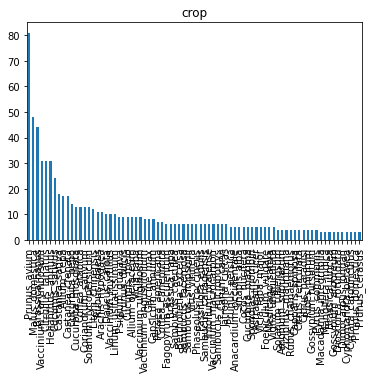

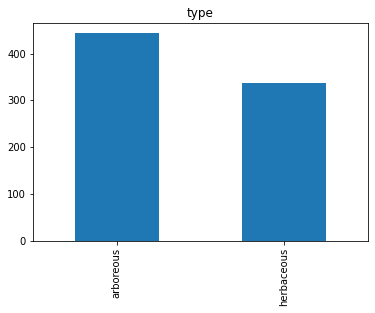

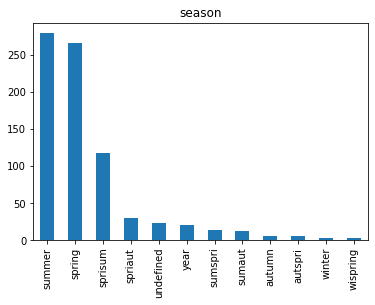

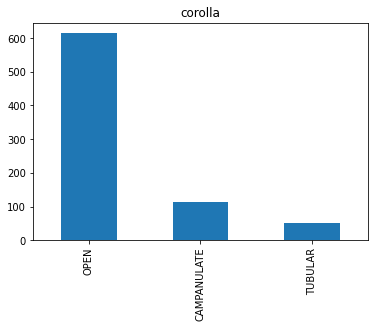

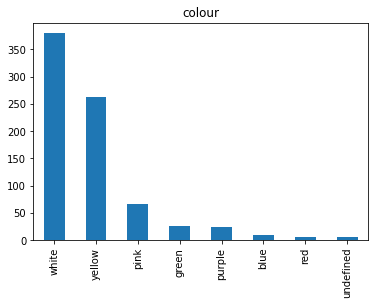

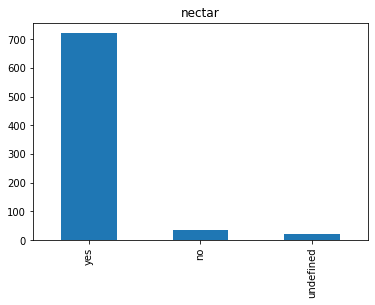

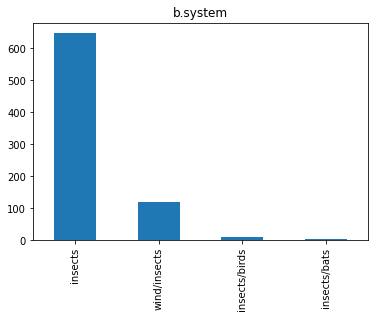

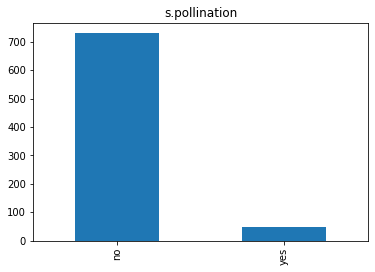

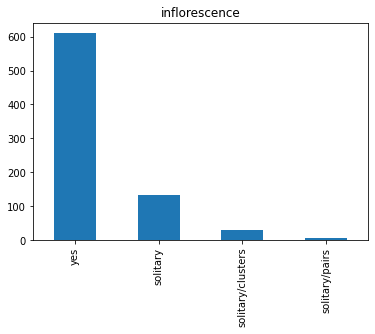

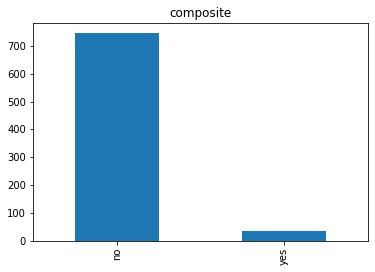

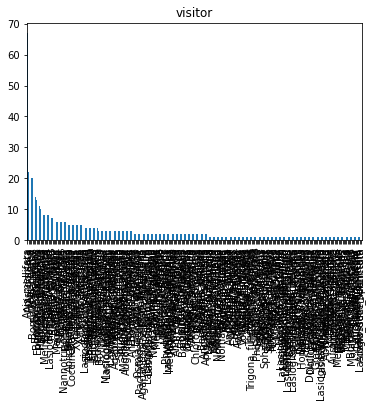

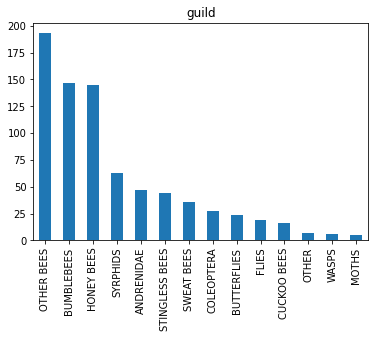

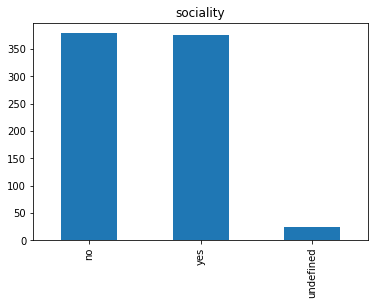

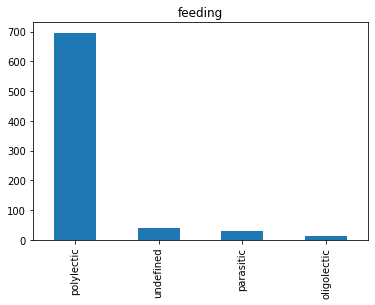

In [68]:
for column in GPD_dataset_subset2_0NaN.columns.tolist():
    plt.pyplot.figure()
    plt.pyplot.title(column)
    GPD_dataset_subset2_0NaN[column].value_counts().plot(kind = 'bar')


We can use Cramer's V correlation value to present a heatmap of correlation between these categorical variables. 

Unfortunately this metric seems a bit biased for "large" number of variables ( [Bergsma, Wicher. (2013). A bias-correction for Cramér's V and Tschuprow's T. Journal of the Korean Statistical Society. 42. 10.1016/j.jkss.2012.10.002.'](http://dx.doi.org/10.1016/j.jkss.2012.10.002]) ). 

For the moment let's apply Cramer's V in a future we will improve the implementation with the bias correction.

In [69]:
CramersV_GPD_subset_object = am.CramersV(GPD_dataset_subset2_0NaN)

In [70]:
CramersV_GPD_subset_matrix = CramersV_GPD_subset_object.fit()

<AxesSubplot:>

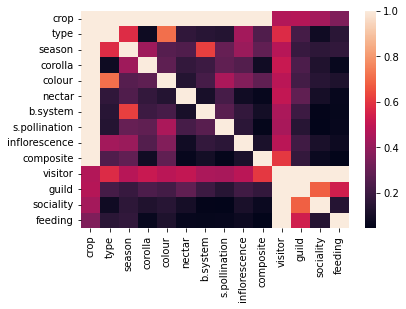

In [71]:
sb.heatmap(CramersV_GPD_subset_matrix)

As we could expect whe have an evident separation of correlation between plants and bees where the crop is higly coreelated with the information about the plants charateristics; the guild is higly related with the pollintators charateristics and the "visitor" variable is the link between the two groups.

Let's focus on the two groups

<AxesSubplot:>

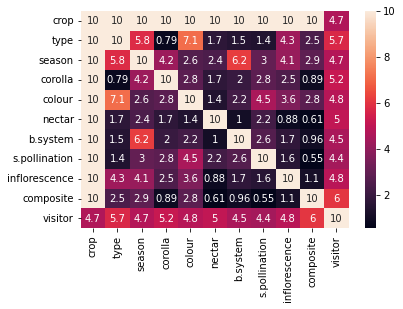

In [89]:
sb.heatmap(CramersV_GPD_subset_matrix.iloc[:11,:11]*10, annot=True)
# since we know that values are betwee 0 and 1 we multply for 10 to avoid most of unusefull "0." 

We can see that type (arboreous or heraceous) seems higly related to the flower colour and also quite related with the season.

The bloom system (bytheway from the values seems more a "pollination type") seems higly related with the flower season. Despite that, the bloom system seems not related with the flower colour and the plant type.


<AxesSubplot:>

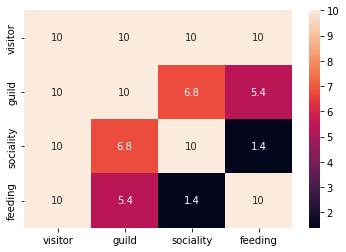

In [92]:
sb.heatmap(CramersV_GPD_subset_matrix.iloc[10:,10:]*10, annot=True)


Quite self-explanatory

Let's have a closer look at the cited plants variables

#### Multi-categorical plot

First of all let's encode the desired variable with numeric values.

For the visualization we can have an advantage encoding with an order even if the variables that we are considering don't have a natural order.

In [93]:
GPD_dataset_subset2_0NaN.columns

Index(['crop', 'type', 'season', 'corolla', 'colour', 'nectar', 'b.system',
       's.pollination', 'inflorescence', 'composite', 'visitor', 'guild',
       'sociality', 'feeding'],
      dtype='object')

In [99]:
type_encoder = LabelEncoder()
type_encoder.fit(GPD_dataset_subset2_0NaN.loc[:,'type'])
type_encoder.classes_


array(['arboreous', 'herbaceous'], dtype=object)

In [100]:
colour_encoder = LabelEncoder()
colour_encoder.fit(GPD_dataset_subset2_0NaN.loc[:,'colour'])
colour_encoder.classes_


array(['blue', 'green', 'pink', 'purple', 'red', 'undefined', 'white',
       'yellow'], dtype=object)

In [157]:
# let's transform "undefined" in "gray"
undefinded_gray = SimpleImputer(missing_values = 'undefined', strategy = 'constant', \
                                fill_value = 'gray')

gray_column_array = undefinded_gray.fit_transform( GPD_dataset_subset2_0NaN.loc[:,'colour'].to_numpy().reshape(-1,1) )

GPD_dataset_subset2_0NaN.loc[:,'colour']= gray_column_array.reshape(-1,1)

/tmp/ipykernel_34953/2547033298.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPD_dataset_subset2_0NaN.loc[:,'colour']= gray_column_array.reshape(-1,1)


In [158]:
colour_encoder = LabelEncoder()
colour_encoder.fit(GPD_dataset_subset2_0NaN.loc[:,'colour'])
colour_encoder.classes_


array(['blue', 'gray', 'green', 'pink', 'purple', 'red', 'white',
       'yellow'], dtype=object)

In [101]:
season_encoder = LabelEncoder()
season_encoder.fit(GPD_dataset_subset2_0NaN.loc[:,'season'])
season_encoder.classes_


array(['autspri', 'autumn', 'spriaut', 'spring', 'sprisum', 'sumaut',
       'summer', 'sumspri', 'undefined', 'winter', 'wispring', 'year'],
      dtype=object)

In [103]:
s_pollination_encoder = LabelEncoder()
s_pollination_encoder.fit(GPD_dataset_subset2_0NaN.loc[:,'s.pollination'])
s_pollination_encoder.classes_

array(['no', 'yes'], dtype=object)

In [105]:
guild_encoder = LabelEncoder()
guild_encoder.fit(GPD_dataset_subset2_0NaN.loc[:,'guild'])
guild_encoder.classes_

array(['ANDRENIDAE', 'BUMBLEBEES', 'BUTTERFLIES', 'COLEOPTERA',
       'CUCKOO BEES', 'FLIES', 'HONEY BEES', 'MOTHS', 'OTHER',
       'OTHER BEES', 'STINGLESS BEES', 'SWEAT BEES', 'SYRPHIDS', 'WASPS'],
      dtype=object)

We want to use simbols to represent "guild", so duble encode it

In [212]:
guild_mark_list =['o','v','<','1','3','s','p','P','*','+','x','d','$omega$','$\\xi$']
guild_mark_encoder = LabelEncoder()
guild_mark_encoder.fit(guild_mark_list)
guild_mark_encoder.classes_

array(['$\\xi$', '$omega$', '*', '+', '1', '3', '<', 'P', 'd', 'o', 'p',
       's', 'v', 'x'], dtype='<U7')

In [118]:
guild_encoder.transform( guild_encoder.classes_ )

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [119]:
guild_mark_encoder.transform( guild_mark_encoder.classes_ )

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [124]:
type(guild_encoder.transform( guild_encoder.classes_ )[0] ) 

numpy.int64

In [213]:
guild_mark_legend = dict(zip(guild_encoder.classes_ , \
                             guild_mark_encoder.inverse_transform( \
                                guild_encoder.transform( guild_encoder.classes_ ) ) ) ) 

guild_mark_legend

{'ANDRENIDAE': '$\\xi$',
 'BUMBLEBEES': '$omega$',
 'BUTTERFLIES': '*',
 'COLEOPTERA': '+',
 'CUCKOO BEES': '1',
 'FLIES': '3',
 'HONEY BEES': '<',
 'MOTHS': 'P',
 'OTHER': 'd',
 'OTHER BEES': 'o',
 'STINGLESS BEES': 'p',
 'SWEAT BEES': 's',
 'SYRPHIDS': 'v',
 'WASPS': 'x'}

In [174]:
fig = px.scatter_3d(GPD_dataset_subset2_0NaN.loc[:,['type','season','s.pollination','colour','guild']], \
                    x ='type', y ='season', z ='s.pollination', \
                    color ='colour', symbol ='guild', opacity=0.7)


In [178]:
fig.show()

mmm we should to add some noise to limitate points overlapping and maybe reshape on higher values, ”or use size to plot less points but add the information of the number of points with that value combination. Maybe the scond option is better for plotly.

RangeIndex(start=0, stop=779, step=1)

In [ ]:

#let's convert colours in matplotlib colour values
colours_list = []
for color_data in GPD_dataset_subset2_0NaN.loc[:,'colour']:
    colours_list.append(plt.colors.CSS4_COLORS[color_data])



GPD_dataset_subset2_0NaN_T = GPD_dataset_subset2_0NaN[['type', 'season', 's.pollination']].copy()
GPD_dataset_subset2_0NaN_T.loc[:,'type'] = type_encoder.transform ( GPD_dataset_subset2_0NaN.loc[:,'type'] )
GPD_dataset_subset2_0NaN_T.loc[:,'season'] = season_encoder.transform ( GPD_dataset_subset2_0NaN.loc[:,'season'] )
GPD_dataset_subset2_0NaN_T.loc[:,'s.pollination'] = s_pollination_encoder.transform ( GPD_dataset_subset2_0NaN.loc[:,'s.pollination'] )
GPD_dataset_subset2_0NaN_T.loc[:,'guild'] = guild_mark_encoder.inverse_transform( \
                                guild_encoder.transform( GPD_dataset_subset2_0NaN.loc[:,'guild'] ))

#let's add some noise
random.seed(6)



In [243]:
GPD_dataset_subset2_0NaN_T.describe()

,type,season,s.pollination
count,779.000000,779.000000,779.000000
mean,0.431322,4.668806,0.062901
std,0.495579,1.965170,0.242941
min,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000
50%,0.000000,4.000000,0.000000
75%,1.000000,6.000000,0.000000
max,1.000000,11.000000,1.000000


/tmp/ipykernel_34953/1936832168.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_34953/1936832168.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_34953/1936832168.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



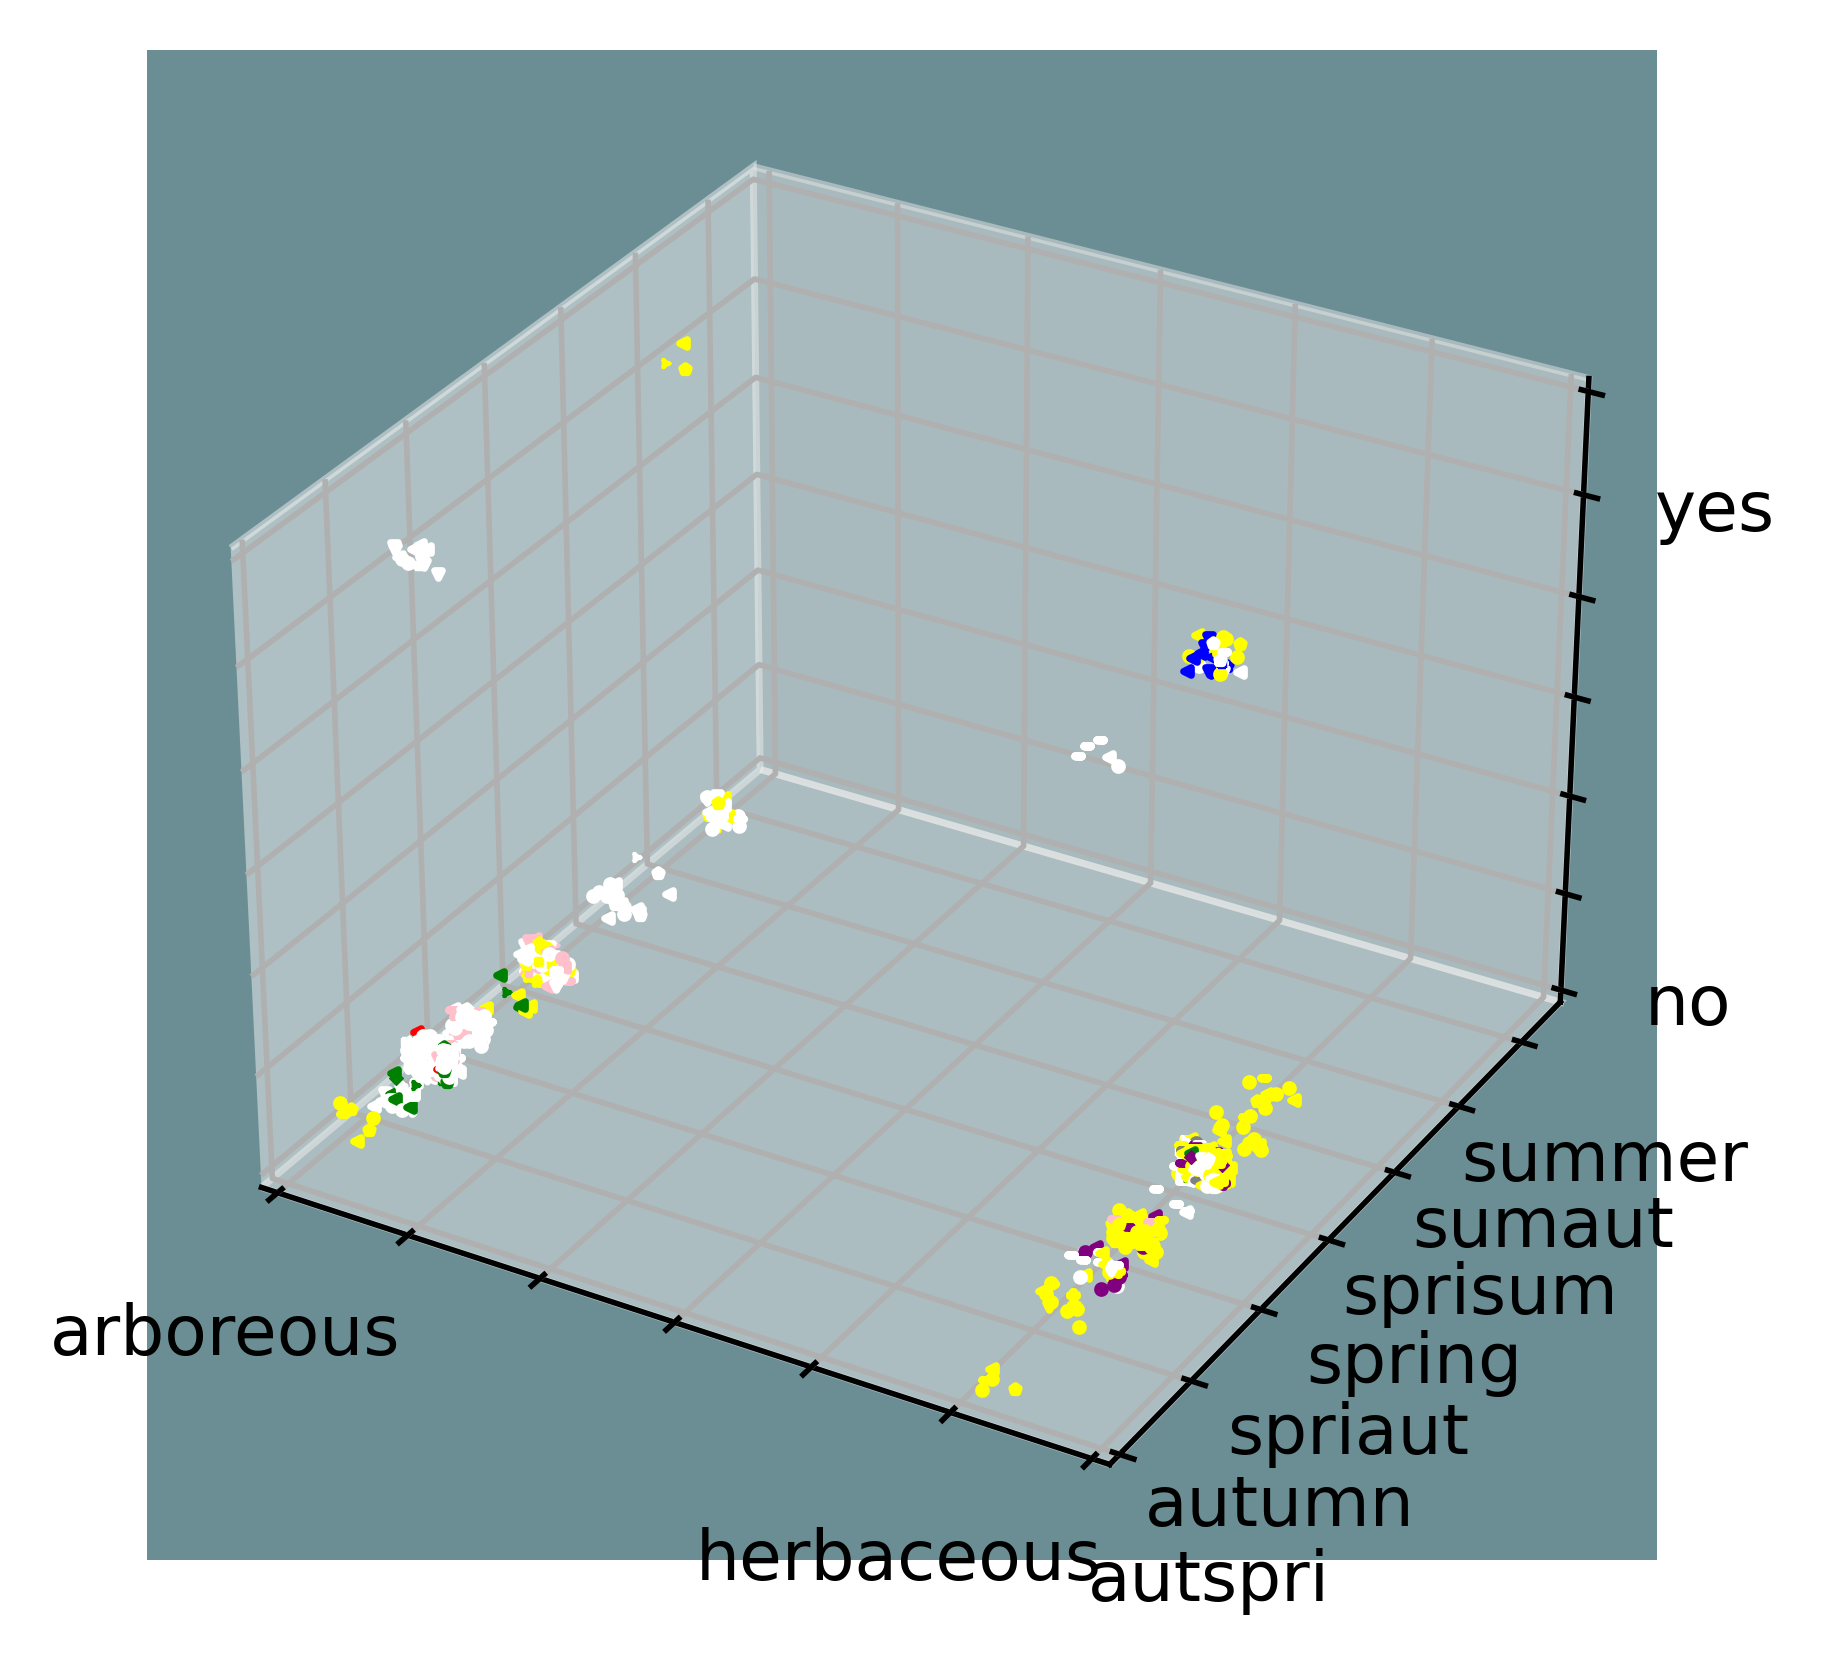

In [366]:
fig = plt.pyplot.figure(dpi = 500)
ax = fig.add_subplot( projection = '3d')

ax.set_xlim(0,6)
ax.set_ylim(0,13)
ax.set_zlim(0,6)
ax.set_xticklabels([type_encoder.inverse_transform([0])[0], '', '', '', '', \
                    type_encoder.inverse_transform([1])[0]])
ax.set_yticklabels(season_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11]))
ax.set_zticklabels([s_pollination_encoder.inverse_transform([0])[0], '', '', '', '', \
                    s_pollination_encoder.inverse_transform([1])[0]])
ax.set_facecolor('#6b8e95')

for i, ind in enumerate(GPD_dataset_subset2_0NaN_T.index):
    ax.scatter(xs = GPD_dataset_subset2_0NaN_T.loc[ind,'type']*5 + random.randrange(0, 1000, )/3000 , \
               ys = GPD_dataset_subset2_0NaN_T.loc[ind,'season'] + random.randrange(0, 1000)/3000  , \
               zs = GPD_dataset_subset2_0NaN_T.loc[ind,'s.pollination']*5 + random.randrange(0, 1000)/3000 , \
               c = colours_list[i], 
               sizes = [1.25], # markers dimension 
               marker = GPD_dataset_subset2_0NaN_T.loc[ind,'guild'])

plt.pyplot.show()


we need more space between season and bigger symbols

/tmp/ipykernel_34953/3275204478.py:7: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_34953/3275204478.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_34953/3275204478.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



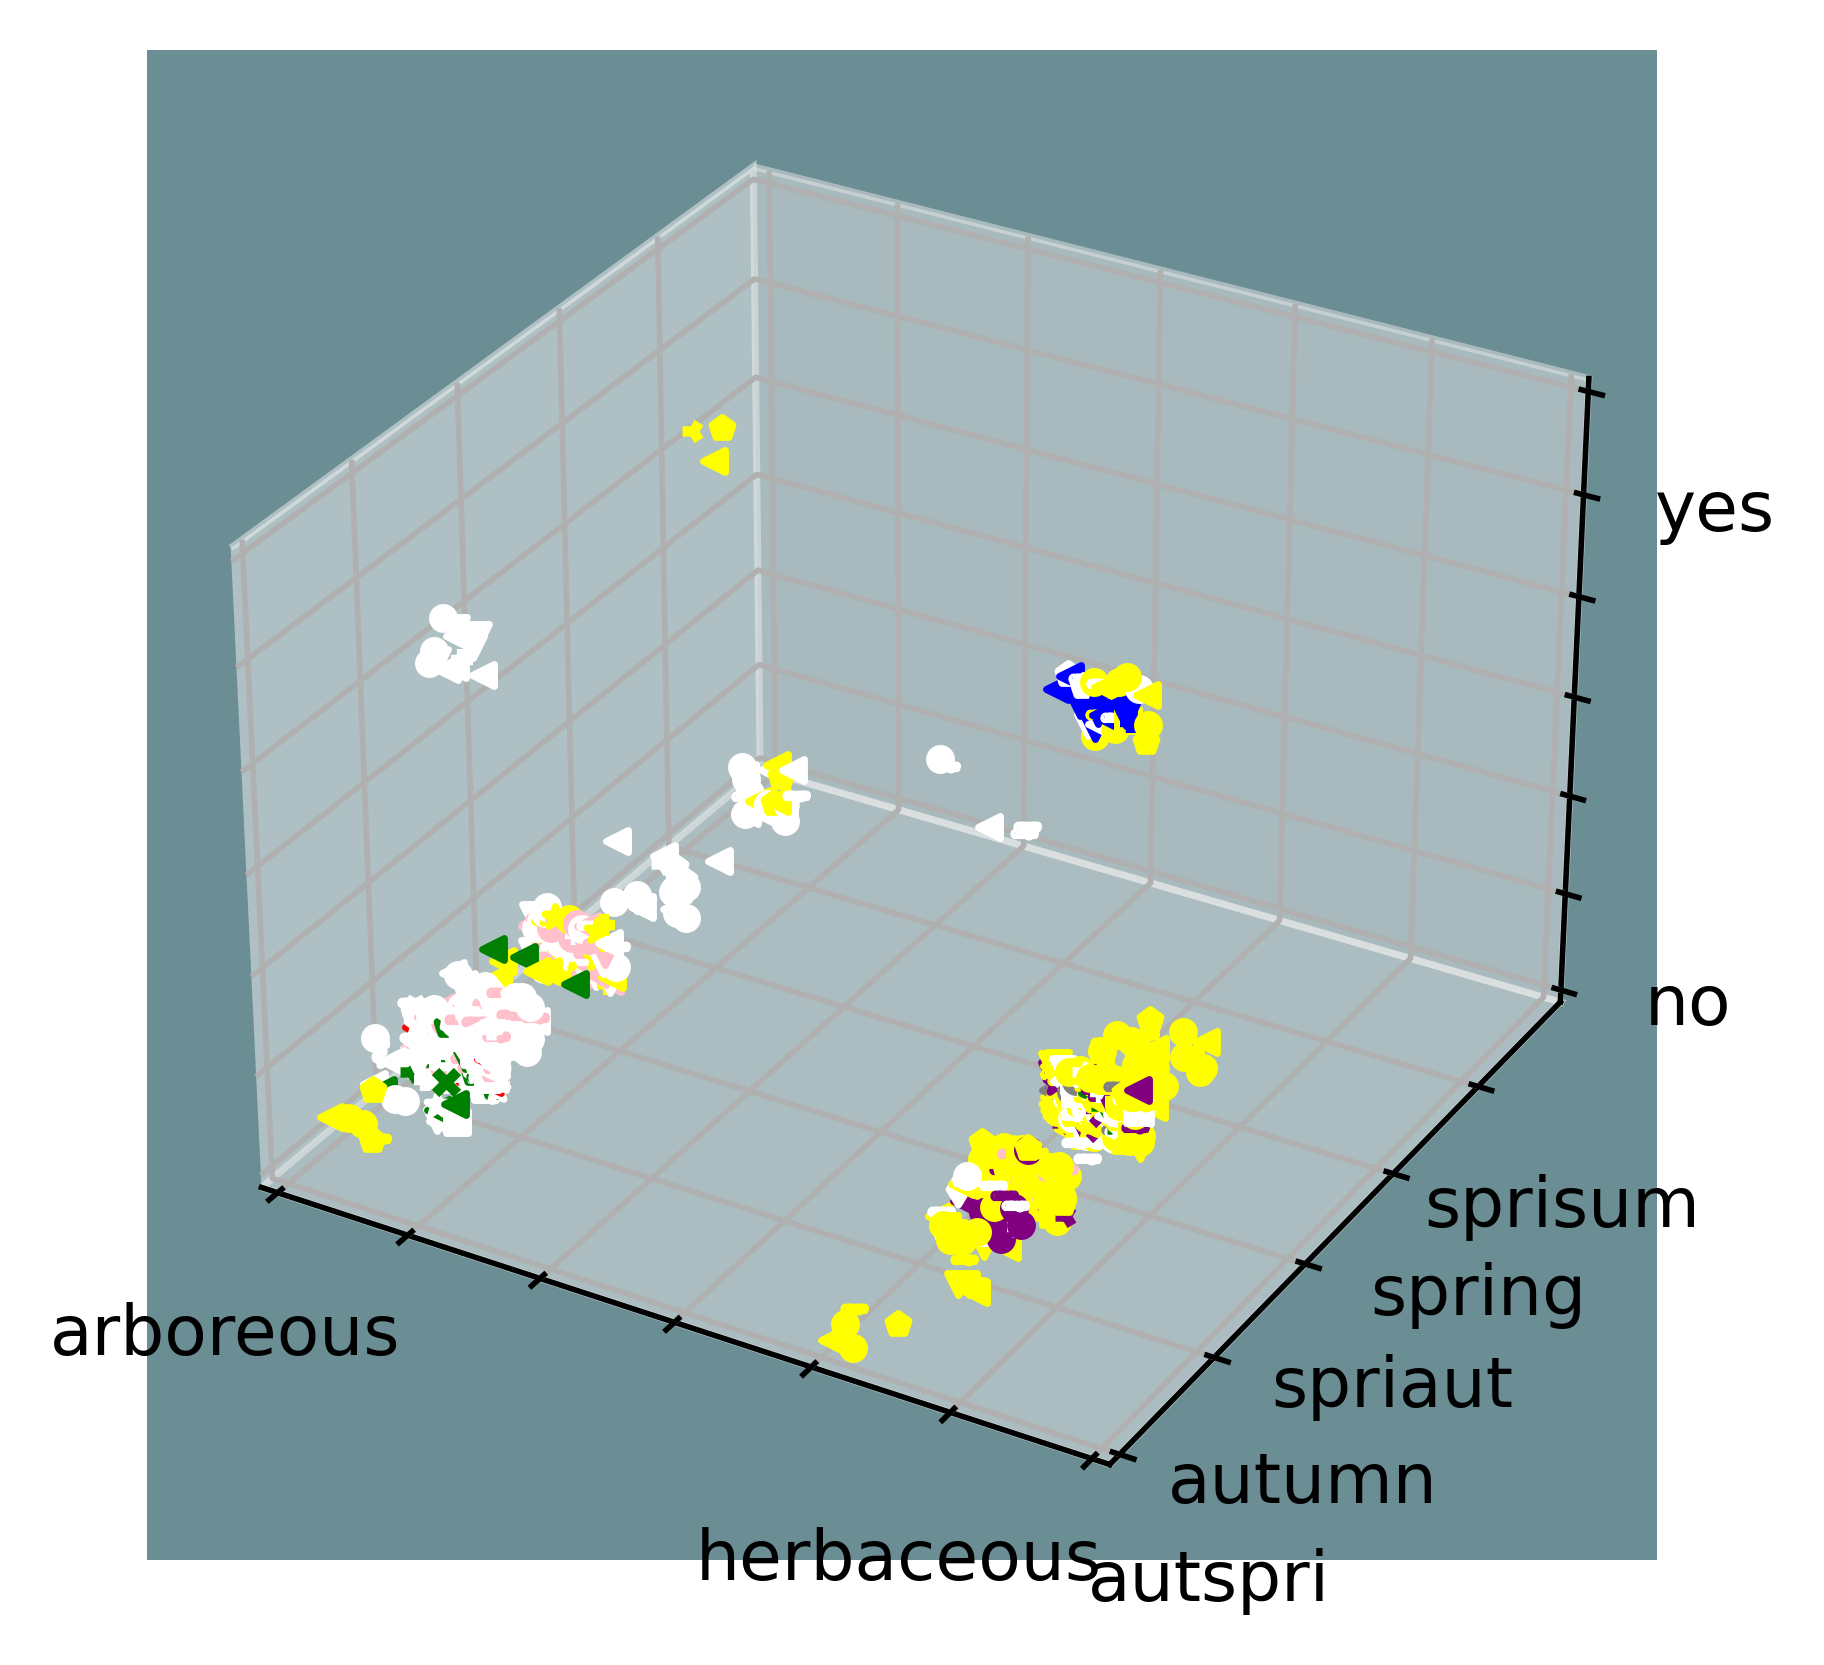

In [367]:
fig = plt.pyplot.figure(dpi = 500)
ax = fig.add_subplot( projection = '3d')

ax.set_xlim(0,3)
ax.set_ylim(0,245)
ax.set_zlim(0,3)
ax.set_xticklabels([type_encoder.inverse_transform([0])[0], '', '', '', '', \
                    type_encoder.inverse_transform([1])[0]])
ax.set_yticklabels(season_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11]))
ax.set_zticklabels([s_pollination_encoder.inverse_transform([0])[0], '', '', '', '', \
                    s_pollination_encoder.inverse_transform([1])[0]])
ax.set_facecolor('#6b8e95')

for i, ind in enumerate(GPD_dataset_subset2_0NaN_T.index):
    ax.scatter(xs = GPD_dataset_subset2_0NaN_T.loc[ind,'type']*2 + random.randrange(0, 1000, )/3000 , \
               ys = GPD_dataset_subset2_0NaN_T.loc[ind,'season']*20 + random.randrange(0, 1000)/3000  , \
               zs = GPD_dataset_subset2_0NaN_T.loc[ind,'s.pollination']*2 + random.randrange(0, 1000)/3000 , \
               c = colours_list[i], 
               sizes = [10], # markers dimension 
               marker = GPD_dataset_subset2_0NaN_T.loc[ind,'guild'])

plt.pyplot.show()


Let's use the size of the markers according to the number of occurrences and try to add noise to better distribute the binary groups

In [331]:
GPD_dataset_subset2_0NaN_T_colour = GPD_dataset_subset2_0NaN_T.copy()
GPD_dataset_subset2_0NaN_T_colour['colour'] = colours_list

In [343]:
len(GPD_dataset_subset2_0NaN_T_colour.value_counts())

177

In [365]:
season_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11])

array(['autspri', 'autumn', 'spriaut', 'spring', 'sprisum', 'sumaut',
       'summer', 'sumspri', 'undefined', 'winter', 'wispring', 'year'],
      dtype=object)

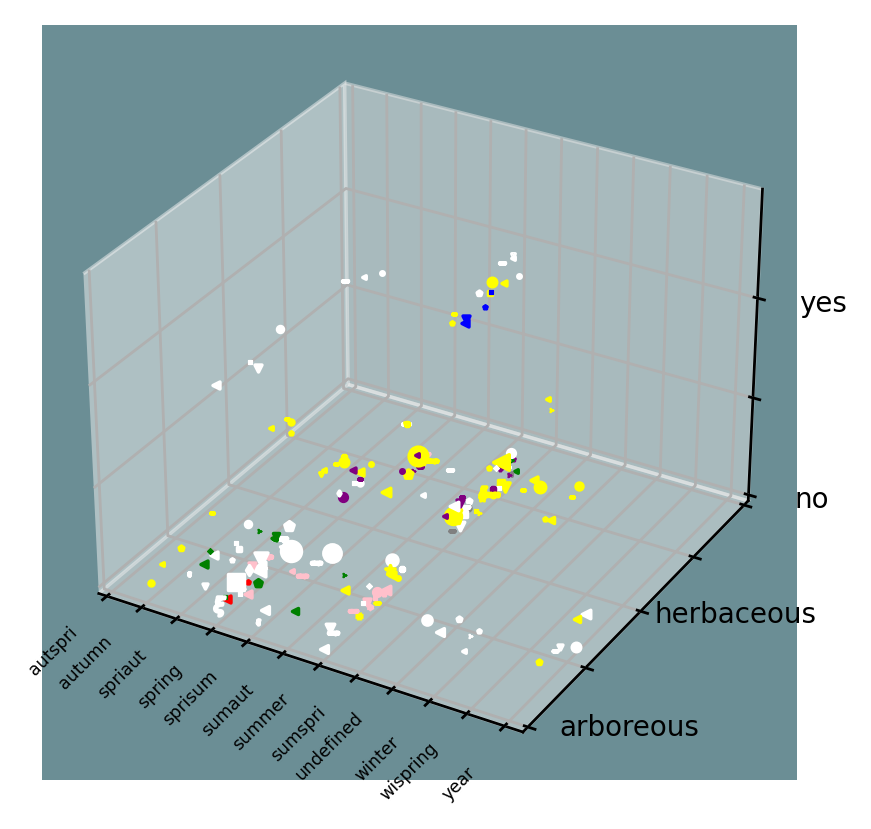

In [416]:
fig = plt.pyplot.figure(dpi = 250)
ax = fig.add_subplot( projection = '3d')

ax.set_xlim(0,450)
ax.set_ylim(0,5)
ax.set_zlim(0,3)
x_label_positions = np.array([0,1,2,3,4,5,6,7,8,9,10,11])*40
ax.set_xticks(x_label_positions.tolist()) 
ax.set_xticklabels(season_encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11]), \
                   fontsize = 5, rotation = 45, ha="right", va="center")
ax.set_yticks([0,1.5,3,4.5,6]) 
ax.set_yticklabels(['', type_encoder.inverse_transform([0])[0], '',\
                    type_encoder.inverse_transform([1])[0], ''], fontsize = 8)
ax.set_zticks([0,1,2]) 
ax.set_zticklabels([s_pollination_encoder.inverse_transform([0])[0], '',\
                    s_pollination_encoder.inverse_transform([1])[0]], fontsize = 8)
ax.set_facecolor('#6b8e95')

for i, ind in enumerate(GPD_dataset_subset2_0NaN_T_colour.value_counts().index):
    ax.scatter(xs = GPD_dataset_subset2_0NaN_T_colour.value_counts().index[i][1]*40 + random.randrange(0, 100)/50  , \
               ys = GPD_dataset_subset2_0NaN_T_colour.value_counts().index[i][0]*3 + random.randrange(0, 100)/50 , \
               zs = GPD_dataset_subset2_0NaN_T_colour.value_counts().index[i][2]*2 + random.randrange(0, 100)/300 , \
               marker = GPD_dataset_subset2_0NaN_T_colour.value_counts().index[i][3],
               c = GPD_dataset_subset2_0NaN_T_colour.value_counts().index[i][4], 
               sizes = [GPD_dataset_subset2_0NaN_T_colour.value_counts().iloc[i]] # markers dimension 
              )

plt.pyplot.show()